In [1]:
import pandas as pd

data = {
    'Client': ['AlphaCorp', 'BetaTech', 'GammaInc', 'DeltaLLC', 'EpsilonCo'],
    'DealValue': [120000, 45000, 80000, 20000, 60000],
    'OnboardingStart': ['2025-06-01', '2025-06-15', '2025-07-01', '2025-07-10', '2025-07-20'],
    'OnboardingEnd': ['2025-06-20', '2025-07-10', None, '2025-08-05', None],
    'SupportTickets': [2, 5, 0, 3, 1],
    'FollowUps': [4, 7, 1, 5, 2],
    'ClientActivityScore': [85, 60, 20, 70, 30],
    'DealDropped': [False, False, True, False, True],
    'DropReason': [None, None, 'Onboarding Delay', None, 'Onboarding Delay']
}

df = pd.DataFrame(data)
df['OnboardingStart'] = pd.to_datetime(df['OnboardingStart'])
df['OnboardingEnd'] = pd.to_datetime(df['OnboardingEnd'])
df['OnboardingDuration'] = (df['OnboardingEnd'] - df['OnboardingStart']).dt.days

print(df)


      Client  DealValue OnboardingStart OnboardingEnd  SupportTickets  \
0  AlphaCorp     120000      2025-06-01    2025-06-20               2   
1   BetaTech      45000      2025-06-15    2025-07-10               5   
2   GammaInc      80000      2025-07-01           NaT               0   
3   DeltaLLC      20000      2025-07-10    2025-08-05               3   
4  EpsilonCo      60000      2025-07-20           NaT               1   

   FollowUps  ClientActivityScore  DealDropped        DropReason  \
0          4                   85        False              None   
1          7                   60        False              None   
2          1                   20         True  Onboarding Delay   
3          5                   70        False              None   
4          2                   30         True  Onboarding Delay   

   OnboardingDuration  
0                19.0  
1                25.0  
2                 NaN  
3                26.0  
4                 NaN  


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Fill missing values
df['OnboardingDuration'] = df['OnboardingDuration'].fillna(-1)
df['Dropped'] = df['DealDropped'].astype(int)

# Features and target
features = ['DealValue', 'OnboardingDuration', 'SupportTickets', 'FollowUps', 'ClientActivityScore']
X = df[features]
y = df['Dropped']




In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [11]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)




,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



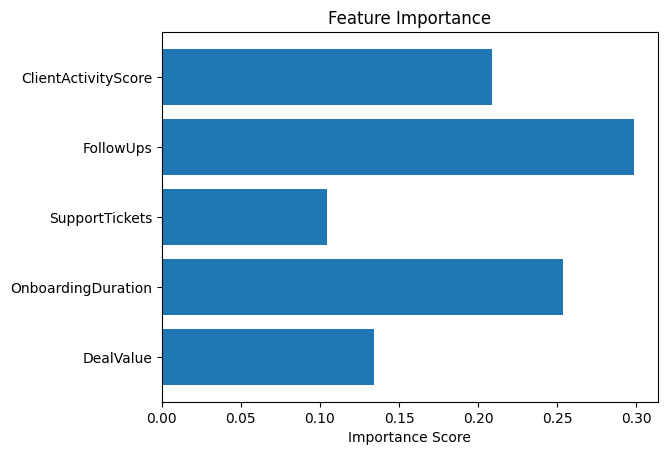

In [13]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
plt.barh(features, importances)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.show()

